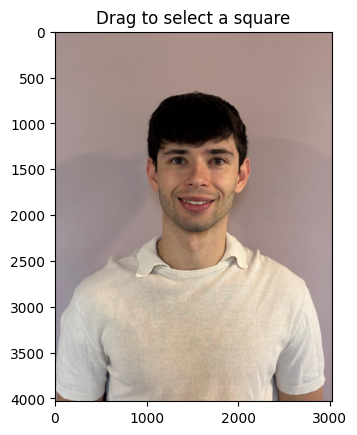

In [1]:
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import matplotlib.image as mpimg

# Load image
img = mpimg.imread("/Users/tizianocausin/Downloads/Causin_Tiziano_photo.jpeg")

fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title("Drag to select a square")

coords = {}  # will store (x1, y1), (x2, y2)

def onselect(eclick, erelease):
    coords['x1'], coords['y1'] = int(eclick.xdata), int(eclick.ydata)
    coords['x2'], coords['y2'] = int(erelease.xdata), int(erelease.ydata)
    print(f"Selected: ({coords['x1']},{coords['y1']}) → ({coords['x2']},{coords['y2']})")

selector = RectangleSelector(ax, onselect,
                             useblit=True,
                             button=[1],  # left mouse button
                             minspanx=5, minspany=5,
                             spancoords='pixels', interactive=True)
plt.show()

# After closing the window, you can access coords['x1'], etc.

In [7]:
import cv2

for i in range(10):
    img = cv2.imread("/Users/tizianocausin/Downloads/Causin_Tiziano_photo.jpeg")

    r = cv2.selectROI("Select area", img)
    print("ROI:", r)  # (x, y, width, height)
    x, y, w, h = map(int, r)

cv2.destroyAllWindows()

#crop = img[y:y+h, x:x+w]

Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
ROI: (928, 620, 1217, 1620)
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
ROI: (901, 614, 1296, 1607)
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
ROI: (916, 585, 1246, 1675)
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
ROI: (912, 613, 1267, 1685)
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
ROI: (885, 635, 444, 360)
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
ROI: (961, 625, 1202, 1667)
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing c button!
ROI: (892, 617, 1283, 1672)
Select a ROI and then press SPACE or ENTER button!
Cancel the selection process by pressing 

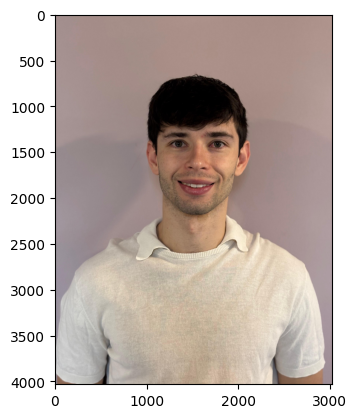

KeyError: 'roi'

In [4]:
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
import cv2

img = cv2.cvtColor(cv2.imread("/Users/tizianocausin/Downloads/Causin_Tiziano_photo.jpeg"), cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots()
ax.imshow(img)
coords = {}

def onselect(eclick, erelease):
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    coords['roi'] = (int(min(x1,x2)), int(min(y1,y2)), int(abs(x2-x1)), int(abs(y2-y1)))
    plt.close(fig)

rs = RectangleSelector(ax, onselect, useblit=True, button=[1], interactive=True)
plt.show()

print("ROI:", coords['roi'])
x, y, w, h = coords['roi']
crop = img[y:y+h, x:x+w]

plt.imshow(crop)
plt.axis('off')
plt.show()

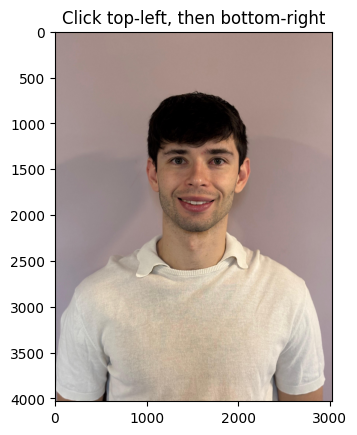

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

# --- Load image ---
img = mpimg.imread("/Users/tizianocausin/Downloads/Causin_Tiziano_photo.jpeg")

# --- Display image ---
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title("Click top-left, then bottom-right")

# --- Store clicks ---
clicks = []

def onclick(event):
    # Only accept clicks inside the axes
    if event.inaxes != ax:
        return

    clicks.append((event.xdata, event.ydata))
    print(f"Clicked: ({event.xdata:.1f}, {event.ydata:.1f})")

    # When two points are clicked, draw rectangle
    if len(clicks) == 2:
        (x1, y1), (x2, y2) = clicks
        x_min, x_max = sorted([x1, x2])
        y_min, y_max = sorted([y1, y2])

        # Draw rectangle
        rect = patches.Rectangle(
            (x_min, y_min),
            x_max - x_min,
            y_max - y_min,
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)
        plt.draw()

        print(f"Rectangle: x={x_min:.1f}, y={y_min:.1f}, width={x_max-x_min:.1f}, height={y_max-y_min:.1f}")

# --- Connect the click event ---
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()